<a href="https://colab.research.google.com/github/moizarsalan/Artificial-Neural-Network/blob/main/Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Abdul Moiz Arsalan**

### **B22F1086AI072**

Lab Instructor: Mam Ammara Irfan

Course Instructor: Dr Arshad Iqbal

### **Import Libraries**

We first import useful Python libraries like pandas, NumPy, and TensorFlow. These tools help us load the data, prepare it, and build our model.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### **Load The data Set**

After that, we load the weather dataset and look at the first few rows. This helps us understand what kind of data we are working with. It’s important to check the data before doing anything else so we don’t face problems later. This step is like setting up everything before starting the real work.



In [3]:
# Read dataset
df = pd.read_csv('/content/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### **Processing the dataset**

In this step, we select the “Summary” column because it has useful text. We remove any rows that are empty and change all text to lowercase to make it easier to work with. Then we join all the summaries into one big string. This string will be used to train our text generator. We also count how many total and unique characters are in the text. This helps us know what the model will learn from.



In [4]:
# Check for nulls in the 'Summary' column
print("Missing Values in Summary:", df['Summary'].isnull().sum())

# Drop rows where 'Summary' is NaN
df = df.dropna(subset=['Summary'])

# Convert all text to lowercase
df['Summary'] = df['Summary'].str.lower()

# Combine all into one string
text = ' '.join(df['Summary'].tolist())


Missing Values in Summary: 0


In [5]:
# Show some stats
print("Total characters:", len(text))
print("Unique characters:", len(set(text)))

Total characters: 1137633
Unique characters: 23


### **Create Character Mapping and Training Sequences**

We break the big string into smaller parts, called sequences. Each sequence is made of a fixed number of characters. We also prepare the next character that comes after each sequence, which will be the output. These small pieces help the model learn patterns in the text. The idea is to teach the model to guess what comes next in a sentence based on what came before.



In [6]:
# Character to index mapping
chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}

In [7]:
# Create sequences
seq_length = 40
step = 3
sequences = []
next_chars = []

for i in range(0, len(text) - seq_length, step):
    sequences.append(text[i:i + seq_length])
    next_chars.append(text[i + seq_length])

print("Number of sequences:", len(sequences))

Number of sequences: 379198


### **Vectorization (One-hot Encoding)**

Before we train the model, we need to convert characters into numbers. We use one-hot encoding, which turns each character into a special format that the model can understand. The input becomes a 3D array and the output is a 2D array. This format is required for training neural networks. Without this step, the model wouldn’t know how to read the characters.



In [8]:
X = np.zeros((len(sequences), seq_length, len(chars)), dtype=np.bool_)
y = np.zeros((len(sequences), len(chars)), dtype=np.bool_)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1


### **Build the RNN Model**

Now we build the RNN model using layers. We add two RNN layers that learn patterns from the text. Then we add an output layer that gives the next character prediction. We use a softmax function to pick the most likely next character. We also choose how the model will learn using a loss function and optimizer. This sets up the brain of our text generator.



In [9]:
# Initial RNN model
model = Sequential()
model.add(SimpleRNN(128, input_shape=(seq_length, len(chars)), return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(len(chars), activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 40, 128)             │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 23)                  │           1,495 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,303 (130.09 KB)

 Trainable params: 33,303 (130.09 KB)

 Non-trainable params: 0 (0.00 B)

### **Train the Model**

In this step, we start training the model using the input and output we prepared. The model reads each sequence and tries to guess the next character. It keeps learning by checking its mistakes and correcting them. We train it for several rounds called epochs. After each round, the model gets a little better. This is how it learns to write like the summaries we gave it.



In [10]:
history = model.fit(X, y, batch_size=128, epochs=10)

Epoch 1/10
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 196s 65ms/step - loss: 0.2368
Epoch 2/10
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 193s 62ms/step - loss: 0.0783
Epoch 3/10
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 203s 62ms/step - loss: 0.0742
Epoch 4/10
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 201s 62ms/step - loss: 0.0746
Epoch 5/10
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 185s 63ms/step - loss: 0.0756
Epoch 6/10
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 205s 63ms/step - loss: 0.0748
Epoch 7/10
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 197s 62ms/step - loss: 0.0724
Epoch 8/10
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 200s 61ms/step - loss: 0.0743
Epoch 9/10
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 206s 63ms/step - loss: 0.0731
Epoch 10/10
2963/2963 ━━━━━━━━━━━━━━━━━━━━ 200s 62ms/step - loss: 0.0749


### **Function to Generate Text**

After training, we use the model to create new text. We give it a starting string, and it tries to guess the next characters one by one. The new characters are added to the sentence, and the sentence grows. This shows how well the model has learned the writing style. It’s a fun way to test the model's ability to generate text.



In [11]:
def generate_text(seed_text, length=200):
    generated = ''
    sentence = seed_text[:seq_length]
    for _ in range(length):
        x_pred = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_to_idx.get(char, 0)] = 1
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = np.argmax(preds)
        next_char = idx_to_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char
    return generated

# Example
print(generate_text("partly cloudy with a chance of ", 300))


yavd ougsc yudr avil u csaeidcuyl re dst mleouzrleaac ouesla tlrudl lzmr oyery dpcl  iilad grl errzrr  hoaueo nr  luy o eitzd eo ytydnd rrrt  mudr zu lrrdic vrlceycaaneo zte rerlisar opidlzrycrr a lorytldedypodeoczavmiddrgulmi fvda boiryzc llurc onclrrrrerydcolevzc arlordtyztdr urevedt fy rlmredy r 


### **Hyperparameter Tuning**

We try changing some settings to make the model work better. These include the number of neurons, the optimizer (like Adam or RMSprop), and activation functions (like ReLU). We also try changing the batch size and learning rate. These changes can help the model learn faster or more accurately. It’s like adjusting tools to get better results.

In [12]:
# Change optimizer
optimizer = RMSprop(learning_rate=0.005)

# Model with ReLU, different neurons, and optimizer
model = Sequential()
model.add(SimpleRNN(256, activation='relu', return_sequences=True, input_shape=(seq_length, len(chars))))
model.add(SimpleRNN(128, activation='relu'))
model.add(Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 40, 256)             │          71,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 128)                 │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 23)                  │           2,967 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,927 (484.09 KB)

 Trainable params: 123,927 (484.09 KB)

 Non-trainable params: 0 (0.00 B)

### **Train Tuned Mode**

After changing the settings, we train the model again. This is to see if the new settings help the model learn better. We might increase the number of epochs or use a different optimizer. Sometimes these small changes can make a big difference. If the model performs better, we keep the new settings.



In [13]:
history = model.fit(X, y, batch_size=64, epochs=5)

Epoch 1/5
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 567s 95ms/step - loss: 97.8849
Epoch 2/5
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 559s 94ms/step - loss: 0.0857
Epoch 3/5
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 556s 94ms/step - loss: 0.0866
Epoch 4/5
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 566s 95ms/step - loss: 0.0871
Epoch 5/5
5925/5925 ━━━━━━━━━━━━━━━━━━━━ 564s 95ms/step - loss: 0.0870


### **Analysis**

**Training Loss:**

We draw a graph to show how the model’s loss changes during training. The loss tells us how many mistakes the model is making. If the line on the graph goes down, it means the model is learning well. This helps us decide if we need to train the model more or stop. It’s a simple way to check model progress.



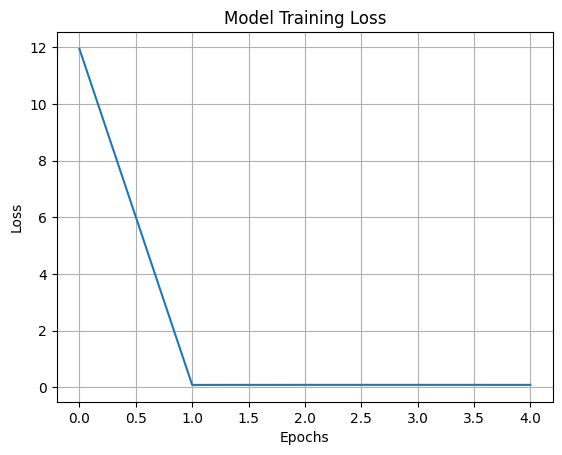

In [14]:
# Plot Training Loss
plt.plot(history.history['loss'])
plt.title("Model Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


**Character Frequency Distribution:**

We count how many times each character appears in the text. This helps us see which characters are used the most. For example, spaces and common letters like 'e' usually appear a lot. This gives us an idea of the writing style and helps us understand the data better. It’s a basic but helpful analysis.

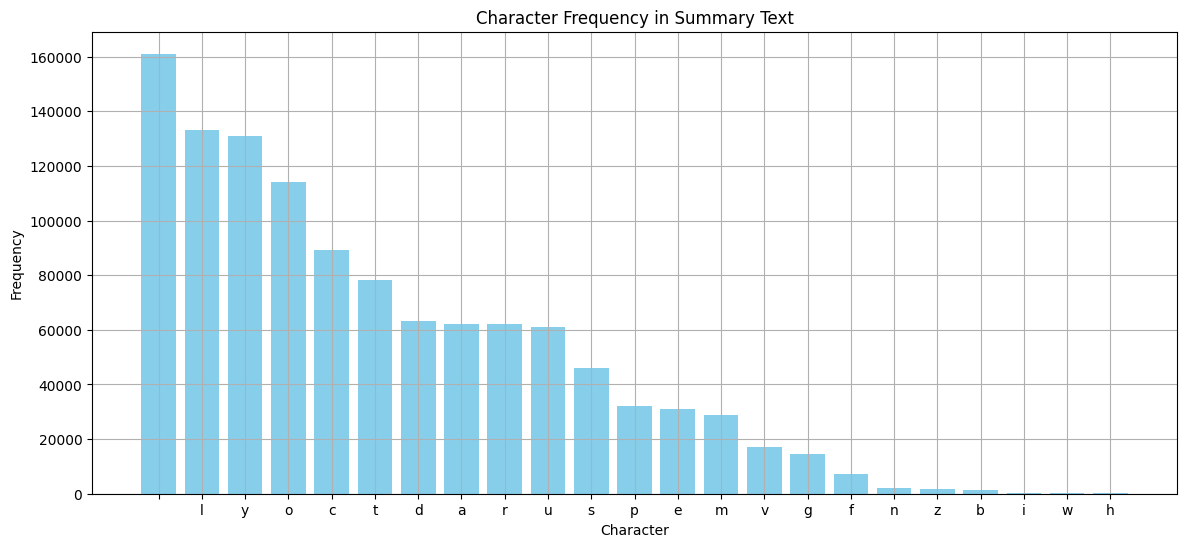

In [15]:
# Character Frequency Distribution
char_freq = Counter(text)
char_freq = dict(sorted(char_freq.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(14,6))
plt.bar(char_freq.keys(), char_freq.values(), color='skyblue')
plt.title('Character Frequency in Summary Text')
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Text Length Distribution**

We check how long the summary texts are in the dataset. Some may be short, while others are long. We draw a histogram to show how many summaries have different lengths. This helps us understand the variety in our text data. If most summaries are very short, we might need more data for training.

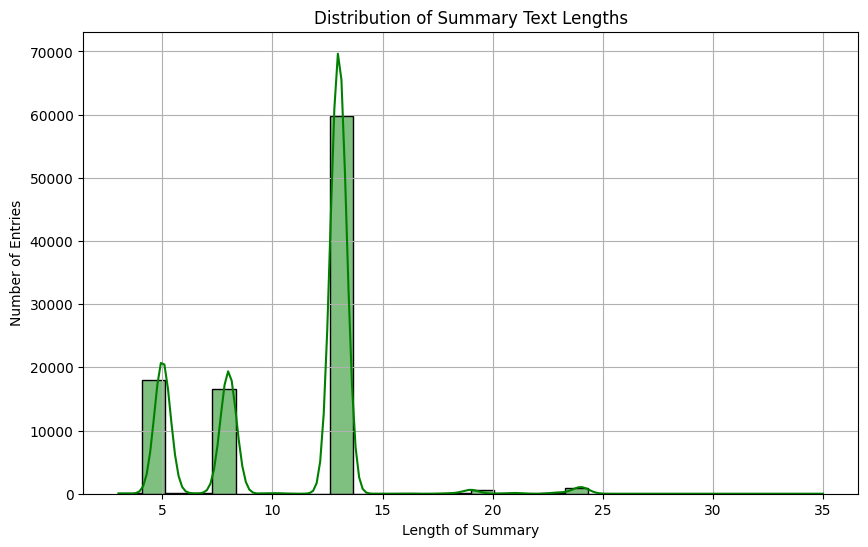

In [17]:
# Text Length Distribution in Summaries
df['summary_length'] = df['Summary'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['summary_length'], bins=30, kde=True, color='green')
plt.title('Distribution of Summary Text Lengths')
plt.xlabel('Length of Summary')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.show()
